In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("supermarket_data.csv")

In [3]:
data.head()

,Unnamed: 0,Организация,ВремяЧека,НомерЧека,НомерКассы,НомерТранзакции,Кассир,НомерАртикула,Товар,Количество,Сумма (руб),Скидка (%)
0,0,"Супермаркет ""РосМаг""",2024-01-01,102935,4,T002935,Белозеров Порфирий Гавриилович,2009,Сок апельсиновый,1,98.23,0
1,1,"Супермаркет ""РосМаг""",2024-01-01,102935,4,T002935,Белозеров Порфирий Гавриилович,2005,Сыр 'Российский',1,283.51,0
2,2,"Супермаркет ""РосМаг""",2024-01-01,109982,3,T009982,Кира Кузьминична Никитина,2001,Молоко 'Домик в деревне',1,50.50,15
3,3,"Супермаркет ""РосМаг""",2024-01-01,109982,3,T009982,Кира Кузьминична Никитина,2003,Яблоки 'Белый налив',1,66.50,0
4,4,"Супермаркет ""РосМаг""",2024-01-01,106511,4,T006511,Громов Василий Фокич,2012,Картофель,7,310.03,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29791 entries, 0 to 29790
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       29791 non-null  int64  
 1   Организация      29791 non-null  object 
 2   ВремяЧека        29791 non-null  object 
 3   НомерЧека        29791 non-null  int64  
 4   НомерКассы       29791 non-null  int64  
 5   НомерТранзакции  29791 non-null  object 
 6   Кассир           29791 non-null  object 
 7   НомерАртикула    29791 non-null  int64  
 8   Товар            29791 non-null  object 
 9   Количество       29791 non-null  int64  
 10  Сумма (руб)      29791 non-null  float64
 11  Скидка (%)       29791 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.7+ MB


In [7]:
data.describe()

,Unnamed: 0,НомерЧека,НомерКассы,НомерАртикула,Количество,Сумма (руб),Скидка (%)
count,29791.000000,29791.000000,29791.000000,29791.000000,29791.000000,29791.000000,29791.000000
mean,14895.000000,104988.953409,5.516196,2010.303414,2.100366,173.966837,3.758014
std,8600.065271,2881.843055,2.864853,5.841077,2.112193,179.117143,6.502889
min,0.000000,100001.000000,1.000000,2001.000000,1.000000,11.930000,0.000000
25%,7447.500000,102491.000000,3.000000,2005.000000,1.000000,65.690000,0.000000
50%,14895.000000,104968.000000,6.000000,2010.000000,1.000000,118.110000,0.000000
75%,22342.500000,107489.000000,8.000000,2015.000000,2.000000,223.175000,5.000000
max,29790.000000,110000.000000,10.000000,2020.000000,23.000000,2080.260000,20.000000


In [8]:
data.isnull().sum()

Unnamed: 0         0
Организация        0
ВремяЧека          0
НомерЧека          0
НомерКассы         0
НомерТранзакции    0
Кассир             0
НомерАртикула      0
Товар              0
Количество         0
Сумма (руб)        0
Скидка (%)         0
dtype: int64

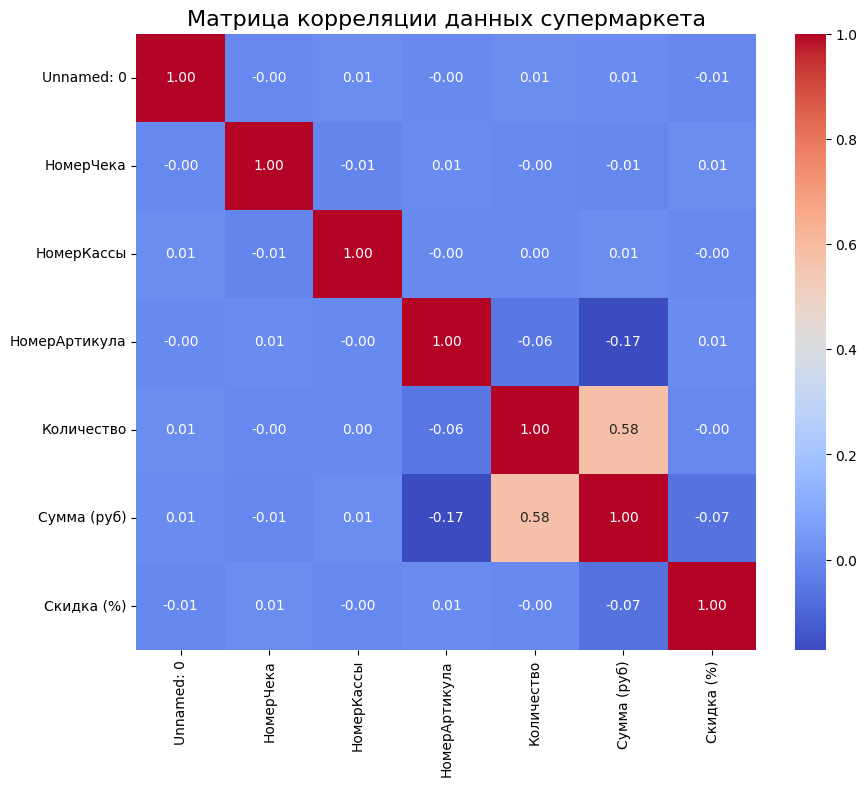

In [31]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции данных супермаркета', fontsize=16)
plt.show()

Наибольшая корреляция наблюдается между столбцами "Количество" и "Сумма (руб)", что ожидаемо, поскольку увеличение количества проданных товаров приводит к увеличению общей суммы.

Отрицательная или низкая корреляция между другими переменными свидетельствует о слабой взаимосвязи между ними.

"Скидка (%)" не имеет значительного влияния на "Сумма (руб)" или "Количество", что указывает на необходимость детального анализа воздействия скидок на продажи.

In [10]:
data['Дата'] = pd.to_datetime(data['ВремяЧека']).dt.date
data['Время'] = pd.to_datetime(data['ВремяЧека']).dt.time

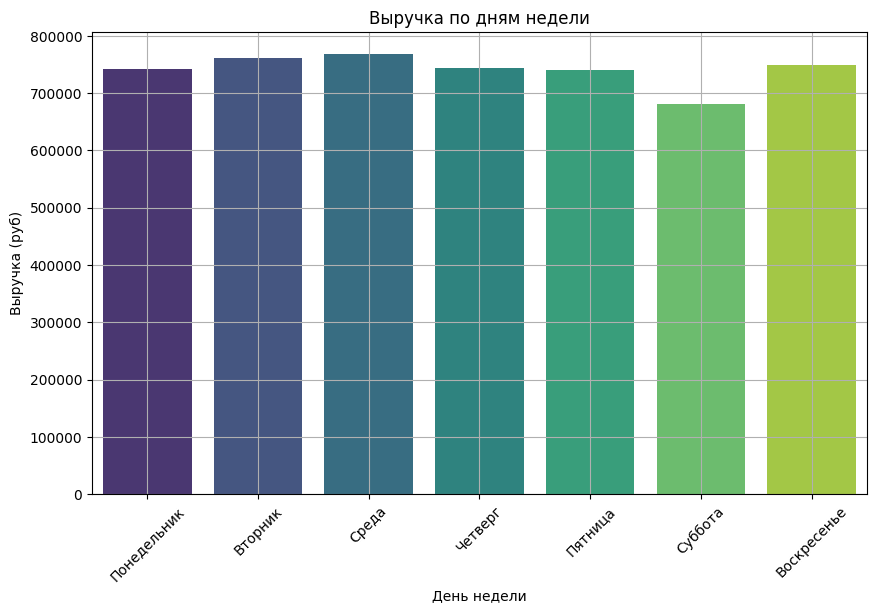

In [23]:
data['День_Недели'] = pd.to_datetime(data['Дата']).dt.day_name(locale='ru_RU')  # Убедимся, что дни недели отображаются на русском

day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

weekly_sales = data.groupby('День_Недели', sort=False)['Сумма (руб)'].sum()

weekly_sales = weekly_sales.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.title('Выручка по дням недели')
plt.xlabel('День недели')
plt.ylabel('Выручка (руб)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Данный график демонстрирует выручку по дням недели.

Общий анализ:

Выручка распределена неравномерно в течение недели, что указывает на различия в покупательской активности по дням.
Максимальная выручка наблюдается в воскресенье, что соответствует ожиданиям для супермаркета, так как это один из самых активных дней для покупок.

Минимальная выручка наблюдается в субботу Это может указывать на:
Особенности расписания работы супермаркета.
Сниженную покупательскую активность из-за внешних факторов (например, конкуренция или погодные условия).
Недостаточное стимулирование покупателей специальными акциями или предложениями.
Рабочие дни:

Во вторник, среду и четверг выручка стабильно высокая, что может быть связано с регулярными покупками, характерными для этих дней.

Рекомендации:

Для увеличения выручки в субботу рекомендуется провести анализ причин низкой активности. 

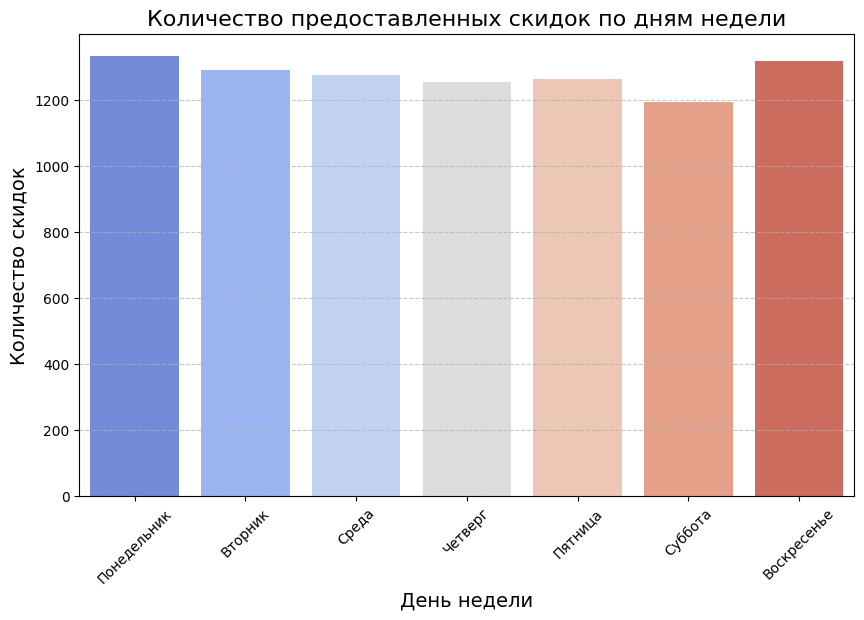

In [25]:
data_with_discounts = data[data['Скидка (%)'] > 0]

discounts_by_day = data_with_discounts.groupby('День_Недели')['Скидка (%)'].count()

day_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
discounts_by_day = discounts_by_day.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=discounts_by_day.index, y=discounts_by_day.values, palette='coolwarm')
plt.title('Количество предоставленных скидок по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Количество скидок', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Количество скидок варьируется по дням недели, с максимальной активностью в воскресенье и минимальной в субботу.

Сравнивая с графиком выручки, видно, что в субботу, когда была зафиксирована самая низкая выручка, также предоставляется наименьшее количество скидок.

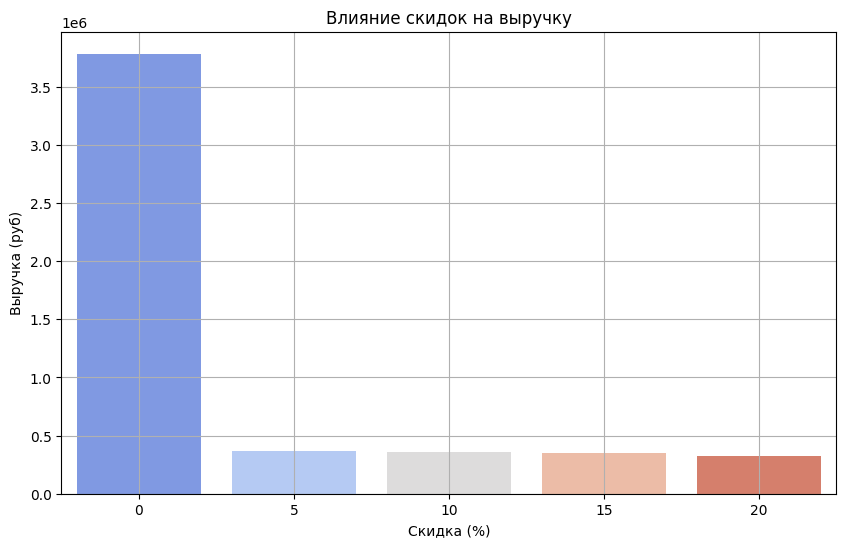

In [13]:
discount_analysis = data.groupby('Скидка (%)')['Сумма (руб)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Скидка (%)', y='Сумма (руб)', data=discount_analysis, palette='coolwarm')
plt.title('Влияние скидок на выручку')
plt.xlabel('Скидка (%)')
plt.ylabel('Выручка (руб)')
plt.grid()
plt.show()

Общий анализ:

Без скидок (0%):
Более 90% выручки (более 3.5 миллионов рублей) приходится на товары, проданные без скидок. Это свидетельствует о том, что основной объем продаж осуществляется по полной стоимости.

Скидки от 5% до 20%:
Остальная часть выручки распределена между скидками от 5% до 20%, причем их вклад примерно одинаков.
Наибольшую долю среди скидочных продаж занимают товары с 5% скидкой.

Особенности:

Скидки на уровне 10%, 15%, и 20% не оказывают существенного влияния на общий объем выручки. Это может быть связано с:

Ограниченным числом акционных товаров в этих категориях.
Низкой частотой использования таких скидок.

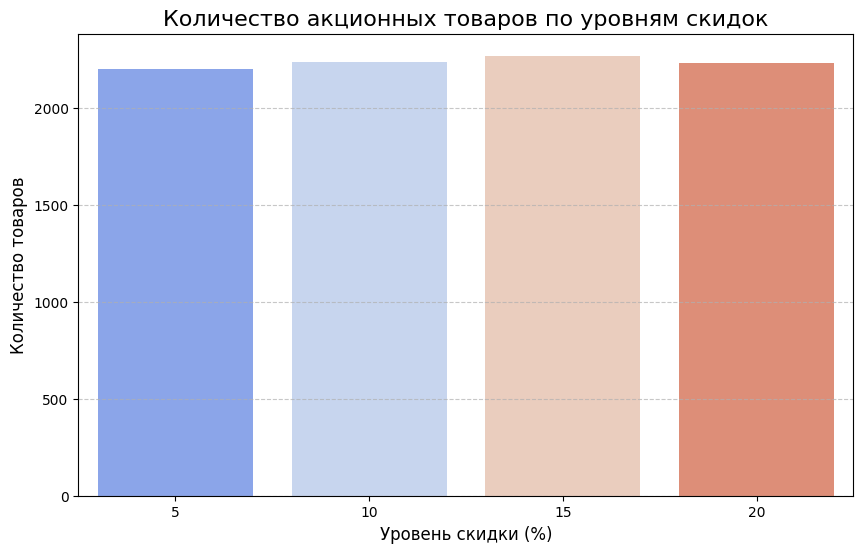

In [26]:
data['Скидка (%)'] = pd.to_numeric(data['Скидка (%)'], errors='coerce')

discounted_items = data[data['Скидка (%)'] > 0]

discount_counts = discounted_items.groupby('Скидка (%)').size().reset_index(name='Количество_Товаров')

plt.figure(figsize=(10, 6))
sns.barplot(x='Скидка (%)', y='Количество_Товаров', data=discount_counts, palette='coolwarm')
plt.title('Количество акционных товаров по уровням скидок', fontsize=16)
plt.xlabel('Уровень скидки (%)', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


График демонстрирует распределение количества акционных товаров по уровням предоставленных скидок (5%, 10%, 15% и 20%). Видно, что количество товаров, предлагаемых на каждом уровне скидки, остается относительно равномерным, что свидетельствует о сбалансированной политике предоставления скидок в супермаркете.

Влияние скидок на выручку: В предыдущем графике мы заметили, что товары со скидками вносят относительно меньший вклад в общую выручку по сравнению с товарами без скидок. Однако равномерное распределение акционных товаров по уровням скидок показывает, что снижение выручки связано скорее с уровнем цен на товары со скидкой, а не с недостатком предложений.

Выводы:
Политика равномерного распределения товаров по уровням скидок поддерживает стабильный покупательский интерес.

Несмотря на меньший вклад акционных товаров в выручку, скидки являются эффективным инструментом для увеличения посещаемости магазина и, возможно, стимулирования дополнительных покупок.

Необходимо уделить внимание оптимизации ассортимента акционных товаров, чтобы максимизировать их вклад в общую выручку.

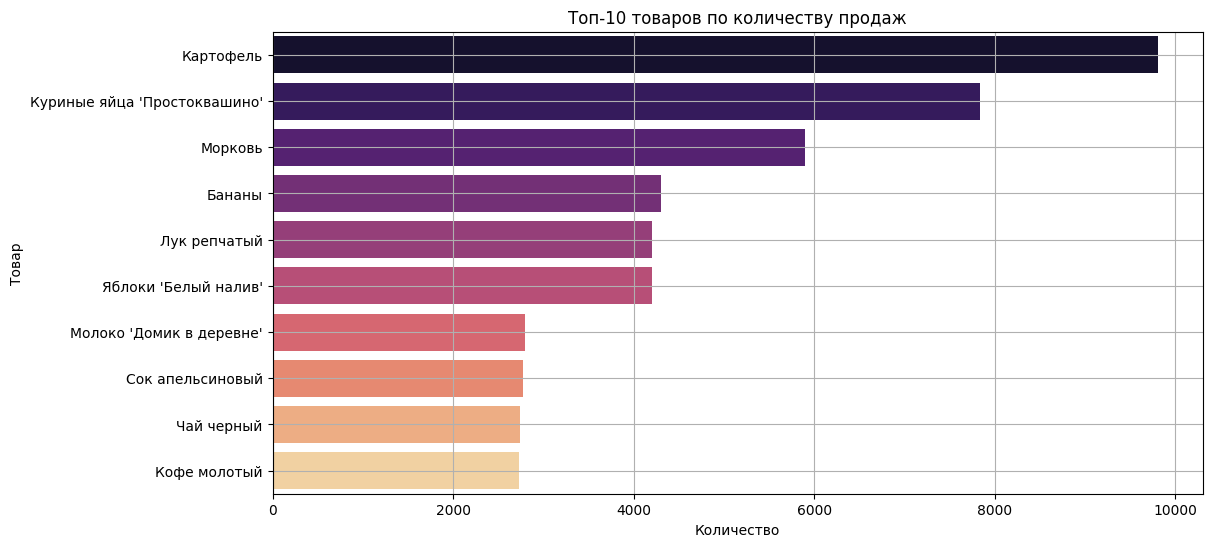

In [15]:
top_products = data.groupby('Товар')['Количество'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Количество', y='Товар', data=top_products, palette='magma')
plt.title('Топ-10 товаров по количеству продаж')
plt.xlabel('Количество')
plt.ylabel('Товар')
plt.grid()
plt.show()

График демонстрирует топ-10 товаров по количеству продаж. На графике видно, что наибольшее количество продаж приходится на базовые продукты питания, такие как картофель, куриные яйца и морковь.

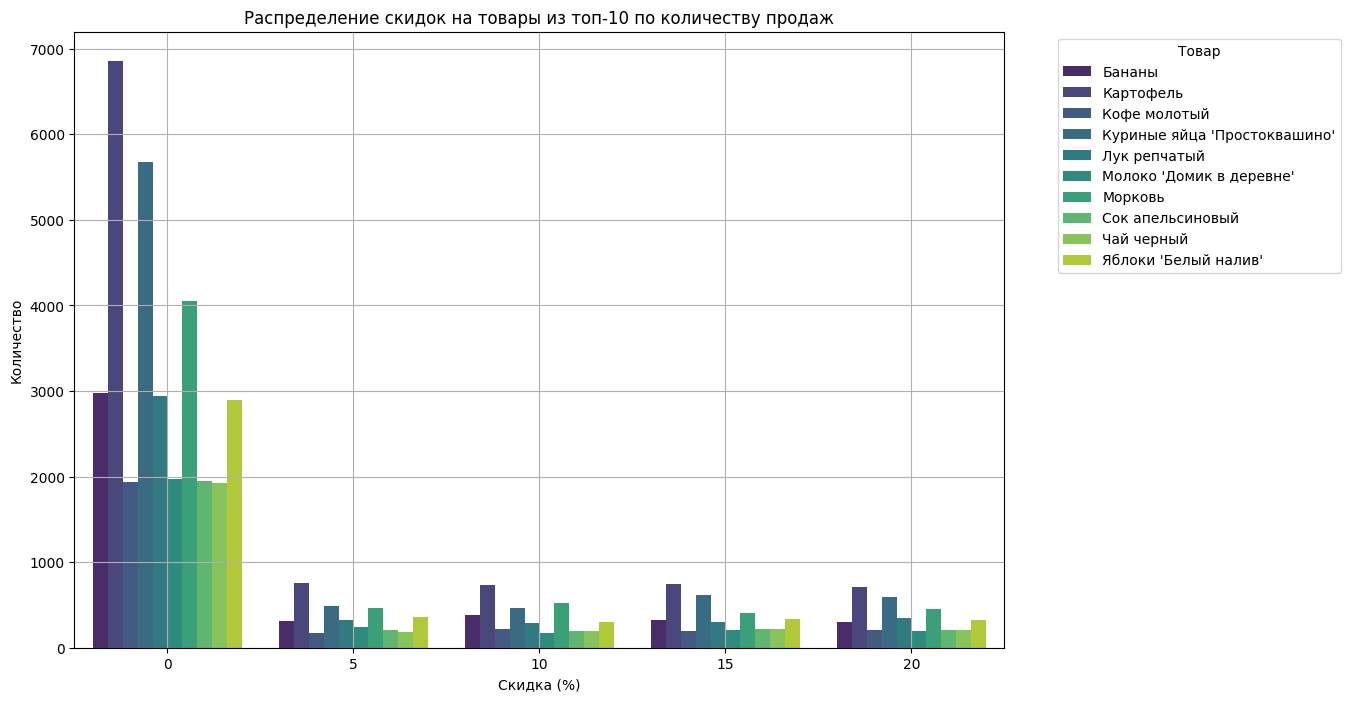

In [29]:
data['Дата'] = pd.to_datetime(data['ВремяЧека']).dt.date

top_products = data.groupby('Товар')['Количество'].sum().nlargest(10).index

top_products_data = data[data['Товар'].isin(top_products)]

discount_analysis = top_products_data.groupby(['Товар', 'Скидка (%)'])['Количество'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=discount_analysis, x='Скидка (%)', y='Количество', hue='Товар', palette='viridis')
plt.title('Распределение скидок на товары из топ-10 по количеству продаж')
plt.xlabel('Скидка (%)')
plt.ylabel('Количество')
plt.legend(title='Товар', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

На графике представлено распределение скидок на товары из топ-10 по количеству продаж. Мы можем сделать следующие выводы:

Большая часть товаров из топ-10 продается без скидок, что свидетельствует о высокой популярности этих товаров независимо от ценовых акций.
Товары, такие как картофель и куриные яйца, демонстрируют особенно высокие объемы продаж даже без скидок.

Рекомендации:

Популярные товары можно использовать для привлечения покупателей, добавляя акции с небольшими скидками для увеличения лояльности.
У товаров с равномерным распределением продаж по скидкам есть потенциал для экспериментов с акциями для стимулирования спроса.

Этот анализ подтверждает, что наибольшая часть выручки обеспечивается товарами, которые продаются без скидок, а скидочные акции играют вспомогательную роль в увеличении объемов продаж. 

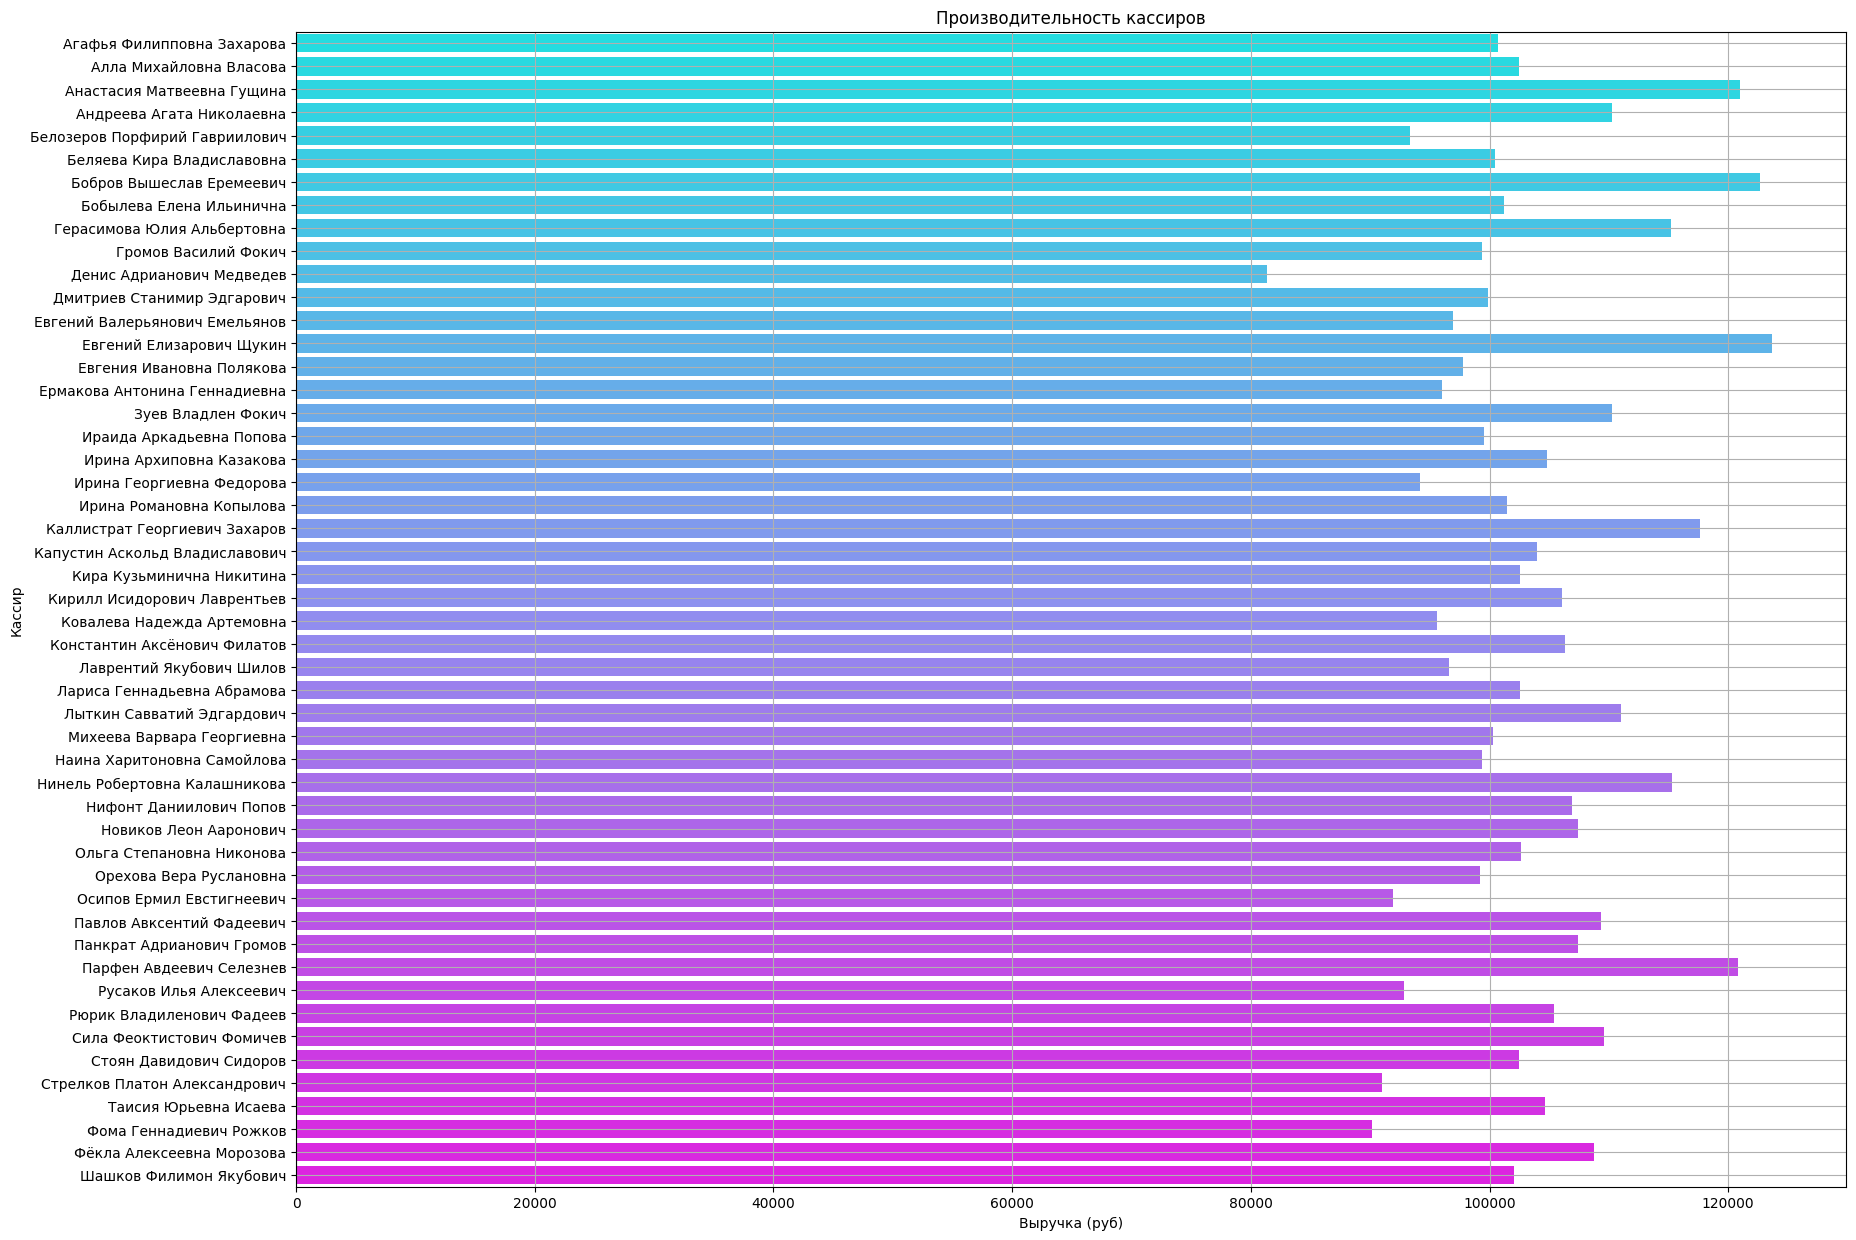

In [17]:
cashier_performance = data.groupby('Кассир')['Сумма (руб)'].sum().reset_index()

plt.figure(figsize=(20, 15))
sns.barplot(x='Сумма (руб)', y='Кассир', data=cashier_performance, palette='cool')
plt.title('Производительность кассиров')
plt.xlabel('Выручка (руб)')
plt.ylabel('Кассир')
plt.grid()
plt.show()

График представляет распределение выручки, собранной каждым кассиром. На горизонтальной оси отложена общая выручка (в рублях), а на вертикальной перечислены имена кассиров. Каждый бар показывает вклад конкретного кассира в общую выручку.

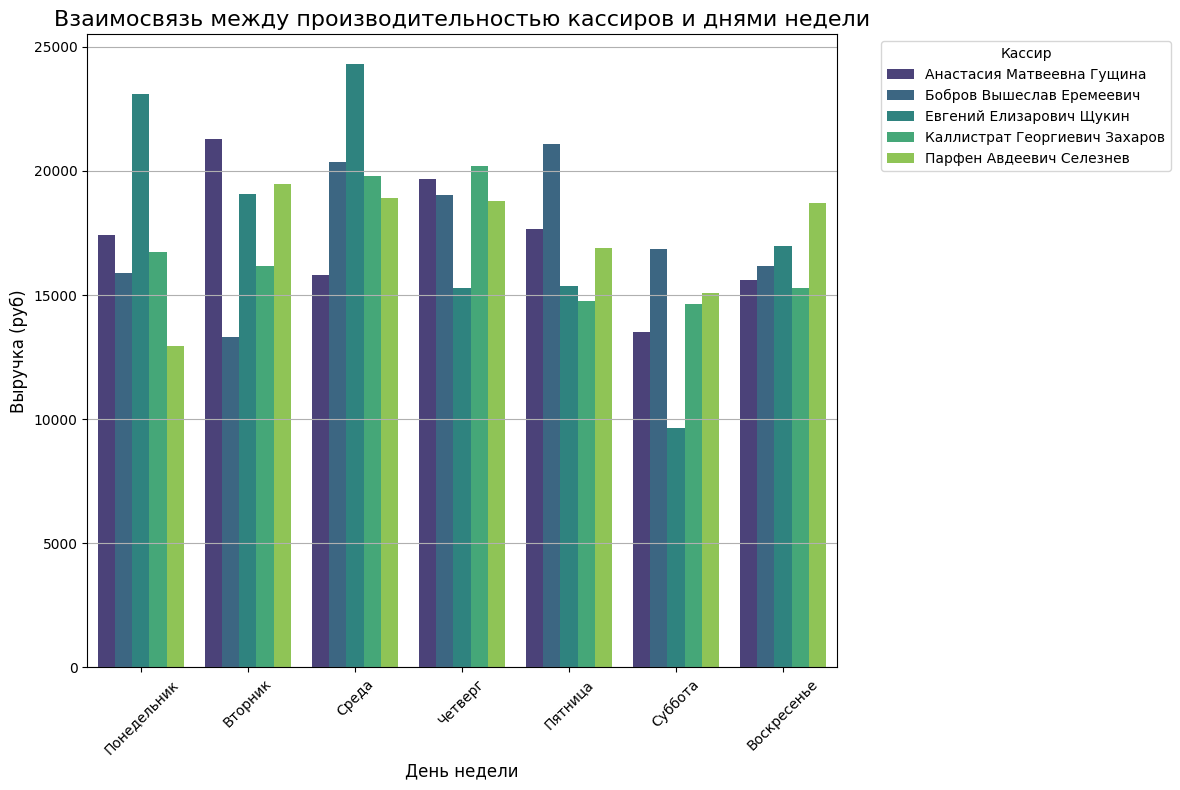

In [30]:
top_cashiers = (
    data.groupby('Кассир')['Сумма (руб)']
    .sum()
    .nlargest(5)
    .index
)

top_cashiers_data = data[data['Кассир'].isin(top_cashiers)]

cashier_weekday_sales = (
    top_cashiers_data.groupby(['Кассир', 'День_Недели'])['Сумма (руб)']
    .sum()
    .reset_index()
)

weekday_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
cashier_weekday_sales['День_Недели'] = pd.Categorical(
    cashier_weekday_sales['День_Недели'], categories=weekday_order, ordered=True
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=cashier_weekday_sales,
    x='День_Недели',
    y='Сумма (руб)',
    hue='Кассир',
    palette='viridis'
)
plt.title('Взаимосвязь между производительностью кассиров и днями недели', fontsize=16)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Выручка (руб)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Кассир', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Среда и воскресенье являются ключевыми днями для выручки, что требует дополнительного внимания к планированию работы в эти дни.
Суббота продолжает оставаться проблемным днем, что может быть связано с общими маркетинговыми стратегиями или предпочтениями клиентов. Это требует детального изучения.
Индивидуальные различия в производительности кассиров могут быть использованы для оптимизации их рабочего графика.

In [20]:
monthly_sales.dtypes
monthly_sales.head()

,Месяц,Сумма (руб)
0,2024-01,432040.07
1,2024-02,401974.29
2,2024-03,432119.89
3,2024-04,420765.44
4,2024-05,430103.97


In [21]:
monthly_sales['Месяц'] = monthly_sales['Месяц'].astype(str)
monthly_sales['Сумма (руб)'] = pd.to_numeric(monthly_sales['Сумма (руб)'], errors='coerce')
monthly_sales.dropna(inplace=True)

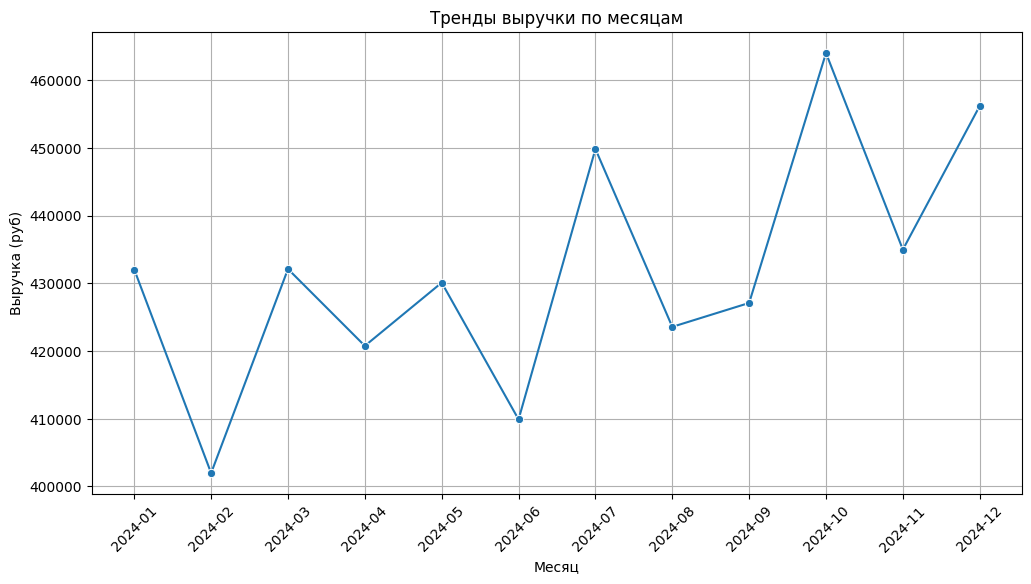

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Месяц', y='Сумма (руб)', data=monthly_sales, marker='o')
plt.title('Тренды выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка (руб)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Минимальные показатели выручки:

Самые низкие значения выручки зафиксированы в феврале и июне.

Февраль: Этот месяц традиционно имеет меньше дней, что ограничивает количество продаж. Кроме того, в феврале нет крупных праздников, стимулирующих потребление.

Июнь: Снижение выручки может быть связано с началом летнего сезона отпусков, когда покупатели тратят меньше на повседневные товары.

Максимальные показатели выручки:

Пики выручки наблюдаются в октябре и декабре.

Октябрь: Возможно, связано с подготовкой к осенним праздникам или активностью перед крупными распродажами, такими как "Чёрная пятница".

Декабрь: Этот месяц характеризуется традиционно высоким уровнем продаж благодаря новогодним праздникам и сезонным распродажам.

Выводы:

График подтверждает сезонный характер продаж, где значительная часть выручки сосредоточена в осенне-зимний период.

Использование полученных данных позволит оптимизировать ассортимент и маркетинговые стратегии в периоды снижения выручки и эффективно управлять повышенным спросом в пиковые месяцы.